## Visualization Case Study: World Life Expectancies

Gapminder is a foundation, based on Sweden, that aims to enhance basic awareness of basic facts about the socioeconomic global world. As part of their efforts, they collect detailed statistics on life expectancy, population, and GDP, sometimes going back over many years. 

In this case study, we'll look at an excerpt of the Gapminder data. This excerpt has been packaged up and made available via Jenny Bryan's [`gapminder` repo](https://github.com/jennybc/gapminder) on Github. 

Here's some familiar code to grab the data. 

In [1]:
import pandas as pd
import numpy as np

gapminder = pd.read_csv("https://philchodrow.github.io/PIC16A/datasets/gapminder.csv")

Let's look at the data

In [2]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


We observe have six columns: the country, the continent on which the country is located, and the year of measurement. We then have three measured variables: life expectancy, population, and GDP per capita in the indicated year.

Our goal is to understand visually the connection between life expectancy and GDP per capita. A good place to start is a simple scatter plot.



# Version 0

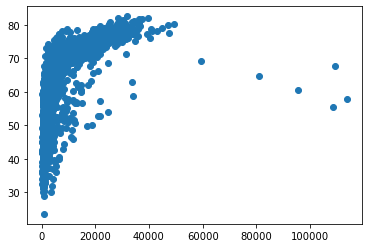

In [5]:
from  matplotlib import pyplot as plt

fig,ax=plt.subplots(1)
ax.scatter(gapminder['gdpPercap'],gapminder['lifeExp'])

How can we improve this?

# Version 1 - log scale


[]

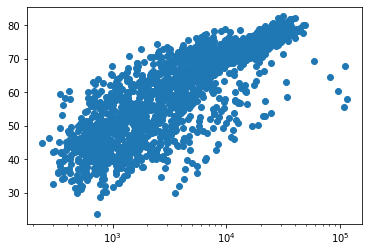

In [7]:
#titles and labels are awesome and very importatn,
#but its usually  a good idea to do those at the end

fig,ax=plt.subplots(1)
ax.scatter(gapminder['gdpPercap'],gapminder['lifeExp'])

#ax.loglog() #loglog
ax.semilogx() #just put x axis on a log scale
#ax.semilogy() #just put the y axis on a log scale

# Version 2 - Let's divide up our data by year

In [10]:
years=gapminder["year"].unique()
len(years)

12

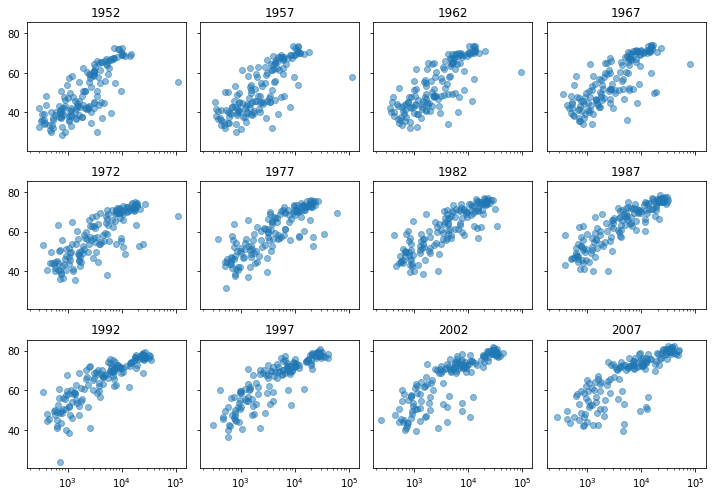

In [19]:
m_cols=4
m_rows=int(len(years)/m_cols)

fig,ax=plt.subplots(m_rows,m_cols, figsize=(10,7),sharex=True,sharey=True)

for k in range(len(years)):
    year_data=gapminder[gapminder["year"]==years[k]]
    
    row= k//m_cols
    col= k%m_cols
    
    ax[row,col].scatter(year_data['gdpPercap'],year_data['lifeExp'],alpha=.5)
    ax[row,col].semilogx()
    
    ax[row,col].set(title=years[k])
    
    plt.tight_layout()

# Version 3 - Now lets add colors

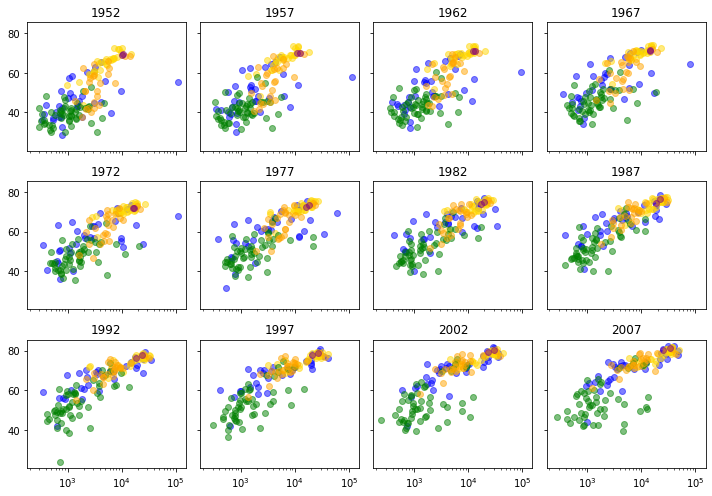

In [21]:
colors={
    "Asia":"Blue",
    "Europe":"Gold",
    "Africa":"Green",
    "Americas":"Orange",
    "Oceania":"Purple"
}
years=gapminder["year"].unique()

continents=gapminder["continent"].unique()

m_cols=4
m_rows=int(len(years)/m_cols)

fig,ax=plt.subplots(m_rows,m_cols, figsize=(10,7),sharex=True,sharey=True)

for k in range(len(years)):
    year_data=gapminder[gapminder["year"]==years[k]]
    
    row= k//m_cols
    col= k%m_cols
    
    for j in range(len(continents)):
        
        continent_data=year_data[year_data["continent"]==continents[j]]
        
        ax[row,col].scatter(continent_data['gdpPercap'],
                            continent_data['lifeExp'],
                            alpha=.5,
                            color=colors[continents[j]])
        ax[row,col].semilogx()
    
    ax[row,col].set(title=years[k])
    
    plt.tight_layout()

# Version 4 - Add a titles and legend

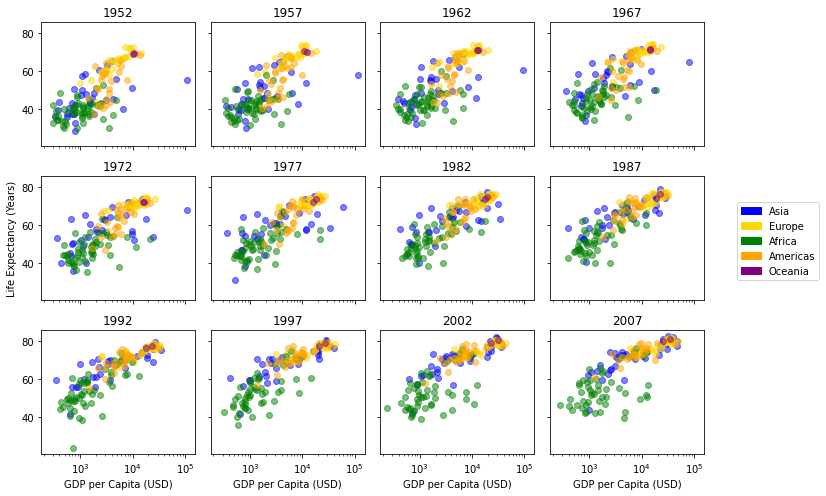

In [23]:
import matplotlib.patches as mpatches

colors={
    "Asia":"Blue",
    "Europe":"Gold",
    "Africa":"Green",
    "Americas":"Orange",
    "Oceania":"Purple"
}
years=gapminder["year"].unique()

continents=gapminder["continent"].unique()

m_cols=4
m_rows=int(len(years)/m_cols)

fig,ax=plt.subplots(m_rows,m_cols, figsize=(10,7),sharex=True,sharey=True)

for k in range(len(years)):
    year_data=gapminder[gapminder["year"]==years[k]]
    
    row= k//m_cols
    col= k%m_cols
    
    for j in range(len(continents)):
        
        continent_data=year_data[year_data["continent"]==continents[j]]
        
        ax[row,col].scatter(continent_data['gdpPercap'],
                            continent_data['lifeExp'],
                            alpha=.5,
                            color=colors[continents[j]])
        ax[row,col].semilogx()
    
    if row==m_rows-1:
        ax[row,col].set(xlabel="GDP per Capita (USD)")
        
    ax[1,0].set(ylabel="Life Expectancy (Years)")
    ax[row,col].set(title=years[k])
    
plt.tight_layout()
    
patches=[mpatches.Patch(color=colors[key],label=key) for key in colors]
fig.legend(handles=patches,bbox_to_anchor=(1.15,.6))